In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
data_jurors = pd.read_csv("jurors.csv")
data_jurors.head(2)

,id,trial,trial__id,race,gender,race_source,gender_source,struck_by,strike_eligibility
0,35,1993-9826--Terry L. Landingham,1,White,Male,Jury strike sheet,Jury strike sheet,Struck for cause,NaN
1,38,1993-9826--Terry L. Landingham,1,Black,Female,Jury strike sheet,Jury strike sheet,Struck for cause,NaN


In [232]:
data_jurors.shape

(14874, 9)

In [233]:
#cant de jurados
print(f'Cantidad de jurados: {len(data_jurors.id.unique())}')

Cantidad de jurados: 14874


In [234]:
#cant de juicios
print(f'Cantidad de juicios: {len(data_jurors.trial__id.unique())}')

Cantidad de juicios: 305


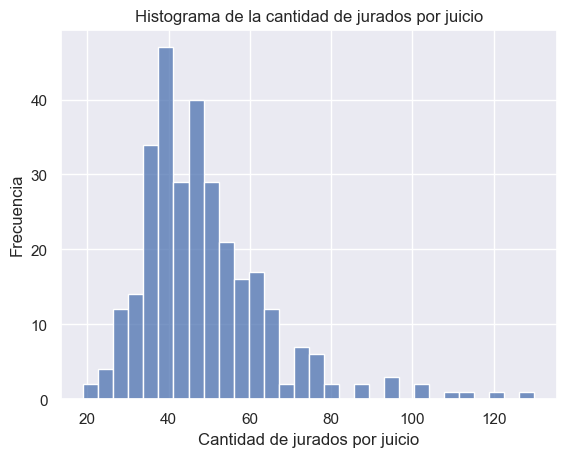

In [235]:
# cantidad de jurados por juicio

juror_x_trial = data_jurors.groupby('trial__id').agg(
    count_juror=pd.NamedAgg(column="id", aggfunc="count")
)

# juror_x_trial['count_juror'].hist(bins=30) #--> graficar serie directamente
sns.histplot(data=juror_x_trial, x='count_juror', bins=30)

plt.xlabel('Cantidad de jurados por juicio')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de jurados por juicio')
plt.show()

In [236]:
juror_x_trial.sort_values(by='count_juror').describe()

,count_juror
count,305.000000
mean,48.767213
std,15.907057
min,19.000000
25%,39.000000
50%,45.000000
75%,54.000000
max,130.000000


-Promedio de jurados por juicio: 48

-Mínimo de jurados en un juicios : 19

-Máximo de jurados en un juicios : 130


In [271]:
#descartar valores fuera del rango intercuartílico para observar posible variación en promedio
mask_interq = (juror_x_trial > q[0.25]) & (juror_x_trial < q[0.75])
juror_x_trial_iqr = juror_x_trial[mask_interq]
juror_x_trial_iqr.describe()

,count_juror
count,141.000000
mean,45.503546
std,4.094638
min,40.000000
25%,42.000000
50%,45.000000
75%,49.000000
max,53.000000


(0.0, 130.0)

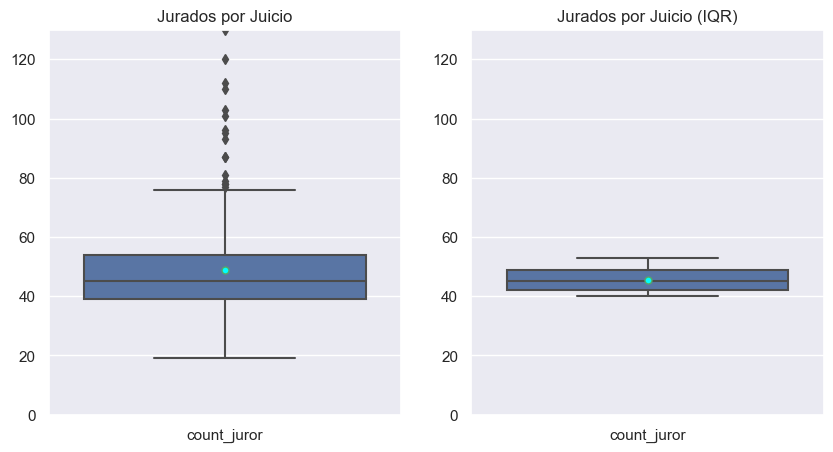

In [272]:
fig, ax = plt.subplots(nrows=1 , ncols=2, figsize=(10, 5))
sns.boxplot(data = juror_x_trial, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"cyan", "markersize":"5"}, ax =ax[0])
ax[0].set_title('Jurados por Juicio')
sns.boxplot(data = juror_x_trial_iqr, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"cyan", "markersize":"5"}, ax =ax[1] )
ax[1].set_title('Jurados por Juicio (IQR)')

ymax = max(juror_x_trial['count_juror'].max(), juror_x_trial_iqr['count_juror'].max())
ax[0].set_ylim(0, ymax)
ax[1].set_ylim(0, ymax)

In [239]:
list(data_jurors.strike_eligibility.unique())

[nan, 'Both State and Defense', 'State', 'Neither', 'Defense']

Both State and Defense    5291
State                     2350
Neither                    235
Defense                    235
Name: strike_eligibility, dtype: int64
Valores nulos  6763
Total de datos  14874


<AxesSubplot:xlabel='strike_eligibility', ylabel='count'>

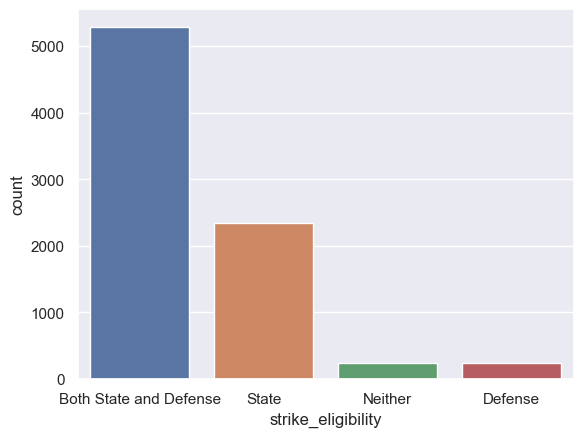

In [240]:
print(data_jurors.strike_eligibility.value_counts())
print(f'Valores nulos ' , data_jurors.strike_eligibility.isna().sum())
print(f'Total de datos ', data_jurors.strike_eligibility.shape[0])

sns.countplot(x='strike_eligibility', data=data_jurors)

Valores nulos  0
Total de datos  14874
Juror chosen to serve on jury    3640
Juror not struck                 3436
Struck by the defense            2301
Struck for cause                 2042
Struck by the state              1852
Struck without notation           571
Juror excused/absent              371
Juror chosen as alternate         370
Unknown                           291
Name: struck_by, dtype: int64


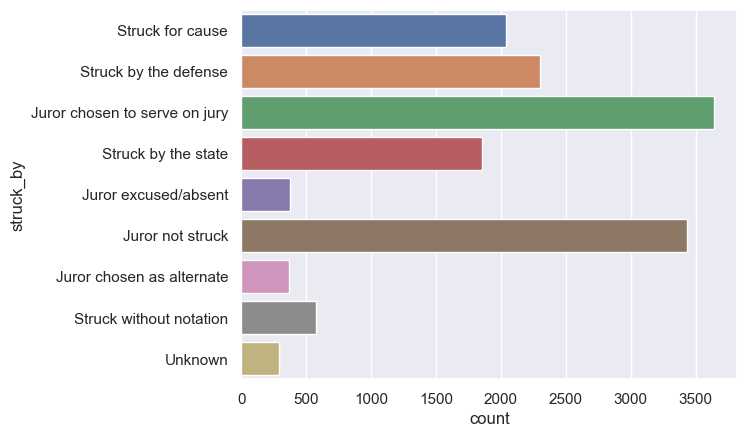

In [273]:
print(f'Valores nulos ' , data_jurors.struck_by.isna().sum())
print(f'Total de datos ', data_jurors.struck_by.shape[0])

sns.countplot(y='struck_by', data=data_jurors)

print(data_jurors.struck_by.value_counts())

In [242]:
data_jurors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14874 entries, 0 to 14873
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  14874 non-null  int64 
 1   trial               14874 non-null  object
 2   trial__id           14874 non-null  int64 
 3   race                14874 non-null  object
 4   gender              14874 non-null  object
 5   race_source         14874 non-null  object
 6   gender_source       14874 non-null  object
 7   struck_by           14874 non-null  object
 8   strike_eligibility  8111 non-null   object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [243]:
data_trials = pd.read_csv("trials.csv")
data_trials.head(5)

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,more_than_four_defendants,judge,prosecutor_1,prosecutor_2,prosecutor_3,prosecutors_more_than_three,def_attny_1,def_attny_2,def_attny_3,def_attnys_more_than_three,offense_code_1,offense_title_1,offense_code_2,offense_title_2,offense_code_3,offense_title_3,offense_code_4,offense_title_4,offense_code_5,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present
0,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Kevin Horan,NaN,NaN,False,"James H. Powell, III",NaN,NaN,False,97-3-7(2)(b),Aggravated Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
1,2,Donovan Johnson,2009-0023,False,True,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Ryan M. Berry,Mike Howie,NaN,False,Rosalind H. Jordan,NaN,NaN,False,41-29-139(a)(1)(b)(1),sale of cocaine,41-29-139(a)(1)(b)(1),sale of cocaine,41-29-139(a)(1)(b)(1),sale of cocaine,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
2,3,Sparky Watson,2004-0257,True,True,Grenada,Black,NaN,NaN,NaN,False,"C. Morgan, III",Susan Denley,Ryan Berry,NaN,False,M. Kevin Horan,Elizabeth Davis,NaN,False,41-29-139(a)(1)(b)(3),sale of marihuana (less than 30 grams),41-29-139(a)(1)(b)(1),sale of cocaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
3,4,Phillip Knickel,1998-0020,False,True,Montgomery,White,NaN,NaN,NaN,False,"Joseph Loper, Jr",Doug Evans,Walter E. Bleck,NaN,False,Raymond M. Baum,NaN,NaN,False,97-3-79,armed robbery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
4,5,Donald Dotson,1994-9918,False,True,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Doug Evans,Kevin Horan,NaN,False,"James H. Powell, III",NaN,NaN,False,97-3-7(2)(a),Aggravated assault,97-3-7(2)(a),Aggravated assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True


In [291]:
import plotly.express as px

fig = px.histogram(data_trials, x="defendant_race", title="Distribución de la raza de los acusados", color_discrete_sequence=['#1f77b4'])
fig.show()

In [244]:
data_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           305 non-null    int64  
 1   defendant_name               305 non-null    object 
 2   cause_number                 305 non-null    object 
 3   state_strikes                305 non-null    bool   
 4   defense_strikes              305 non-null    bool   
 5   county                       305 non-null    object 
 6   defendant_race               305 non-null    object 
 7   second_defendant_race        15 non-null     object 
 8   third_defendant_race         2 non-null      object 
 9   fourth_defendant_race        0 non-null      float64
 10  more_than_four_defendants    305 non-null    bool   
 11  judge                        305 non-null    object 
 12  prosecutor_1                 303 non-null    object 
 13  prosecutor_2        

In [245]:
data_voir_dire_answers = pd.read_csv("voir_dire_answers.csv")
data_voir_dire_answers.head(1)

,id,juror_id,juror_id__trial__id,no_responses,married,children,religious,education,leans_state,leans_defense,leans_ambi,moral_hardship,job_hardship,caretaker,communication,medical,employed,social,prior_jury,crime_victim,fam_crime_victim,accused,fam_accused,eyewitness,fam_eyewitness,military,law_enforcement,fam_law_enforcement,premature_verdict,premature_guilt,premature_innocence,def_race,vic_race,def_gender,vic_gender,def_social,vic_social,def_age,vic_age,def_sexpref,vic_sexpref,def_incarcerated,vic_incarcerated,beliefs,other_biases,innocence,take_stand,arrest_is_guilt,cant_decide,cant_affirm,cant_decide_evidence,cant_follow,know_def,know_vic,know_wit,know_attny,civil_plantiff,civil_def,civil_witness,witness_defense,witness_state,prior_info,death_hesitation,no_death,no_life,no_cops,yes_cops,legally_disqualified,witness_ambi,notes
0,1521,107.0,3.0,False,unknown,unknown,unknown,unknown,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN


In [246]:
data_voir_dire_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3546 non-null   int64  
 1   juror_id              3545 non-null   float64
 2   juror_id__trial__id   3545 non-null   float64
 3   no_responses          3546 non-null   bool   
 4   married               3546 non-null   object 
 5   children              3546 non-null   object 
 6   religious             3546 non-null   object 
 7   education             3546 non-null   object 
 8   leans_state           3546 non-null   bool   
 9   leans_defense         3546 non-null   bool   
 10  leans_ambi            3546 non-null   bool   
 11  moral_hardship        3546 non-null   bool   
 12  job_hardship          3546 non-null   bool   
 13  caretaker             3546 non-null   bool   
 14  communication         3546 non-null   bool   
 15  medical              

In [293]:
#unión jueces con juicios

merged_jurors_trials = pd.merge(data_jurors, data_trials, left_on='trial__id', right_on='id')
print(merged_jurors_trials.shape)

(14874, 47)


In [294]:
merged_jurors_trials.columns

Index(['id_x', 'trial', 'trial__id', 'race', 'gender', 'race_source',
       'gender_source', 'struck_by', 'strike_eligibility', 'id_y',
       'defendant_name', 'cause_number', 'state_strikes', 'defense_strikes',
       'county', 'defendant_race', 'second_defendant_race',
       'third_defendant_race', 'fourth_defendant_race',
       'more_than_four_defendants', 'judge', 'prosecutor_1', 'prosecutor_2',
       'prosecutor_3', 'prosecutors_more_than_three', 'def_attny_1',
       'def_attny_2', 'def_attny_3', 'def_attnys_more_than_three',
       'offense_code_1', 'offense_title_1', 'offense_code_2',
       'offense_title_2', 'offense_code_3', 'offense_title_3',
       'offense_code_4', 'offense_title_4', 'offense_code_5',
       'offense_title_5', 'offense_code_6', 'offense_title_6', 'more_than_six',
       'verdict', 'case_appealed', 'batson_claim_by_defense',
       'batson_claim_by_state', 'voir_dire_present'],
      dtype='object')

In [295]:
print(f'Jurados:',data_jurors.columns)
print(f'Juicios:',data_trials.columns)
print(f'Encuesta:',data_voir_dire_answers.columns)

Jurados: Index(['id', 'trial', 'trial__id', 'race', 'gender', 'race_source',
       'gender_source', 'struck_by', 'strike_eligibility'],
      dtype='object')
Juicios: Index(['id', 'defendant_name', 'cause_number', 'state_strikes',
       'defense_strikes', 'county', 'defendant_race', 'second_defendant_race',
       'third_defendant_race', 'fourth_defendant_race',
       'more_than_four_defendants', 'judge', 'prosecutor_1', 'prosecutor_2',
       'prosecutor_3', 'prosecutors_more_than_three', 'def_attny_1',
       'def_attny_2', 'def_attny_3', 'def_attnys_more_than_three',
       'offense_code_1', 'offense_title_1', 'offense_code_2',
       'offense_title_2', 'offense_code_3', 'offense_title_3',
       'offense_code_4', 'offense_title_4', 'offense_code_5',
       'offense_title_5', 'offense_code_6', 'offense_title_6', 'more_than_six',
       'verdict', 'case_appealed', 'batson_claim_by_defense',
       'batson_claim_by_state', 'voir_dire_present'],
      dtype='object')
Encuesta: Index

In [251]:
# busqueda de columnas en comun
common_cols = set(data_jurors.columns).intersection(set(data_trials.columns)).intersection(set(data_voir_dire_answers.columns))
common_cols

{'id'}

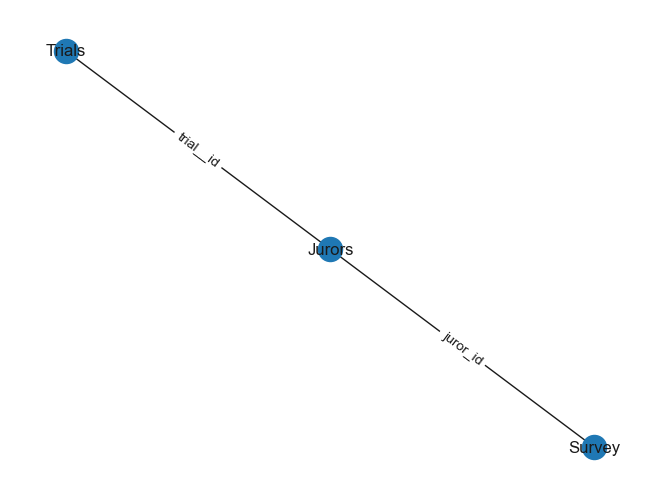

In [252]:
import networkx as nx

# Crear el grafo
G = nx.Graph()

# Agregar nodos (tablas)
G.add_node('Jurors')
G.add_node('Trials')
G.add_node('Survey')

# Agregar conexiones (columnas)
G.add_edge('Jurors', 'Trials', column='trial__id')
G.add_edge('Survey', 'Jurors', column='juror_id')

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Agregar etiquetas a las conexiones (columnas)
labels = {('Jurors', 'Trials'): 'trial__id', ('Survey', 'Jurors'): 'juror_id'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


-id_x ---> id jurado

-id_y ---> id juicio

-id ---> id cuestionario

In [296]:
#unión merge con voir

#para ver todas las columnas
pd.set_option('display.max_columns', None)

#merge con todos los jurados aunque no conozcamos sus datos de encuesta ---> 14875
# data = pd.merge(merged_data , data_voir_dire_answers, left_on='id_x', right_on='juror_id', how = 'outer')
#merge con todos los jurados con sus datos de encuesta ---> 3545
data = pd.merge(merged_jurors_trials , data_voir_dire_answers, left_on='id_x', right_on='juror_id')
print(data.shape)

data.head(5)

(3545, 117)


,id_x,trial,trial__id,race,gender,race_source,gender_source,struck_by,strike_eligibility,id_y,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,more_than_four_defendants,judge,prosecutor_1,prosecutor_2,prosecutor_3,prosecutors_more_than_three,def_attny_1,def_attny_2,def_attny_3,def_attnys_more_than_three,offense_code_1,offense_title_1,offense_code_2,offense_title_2,offense_code_3,offense_title_3,offense_code_4,offense_title_4,offense_code_5,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present,id,juror_id,juror_id__trial__id,no_responses,married,children,religious,education,leans_state,leans_defense,leans_ambi,moral_hardship,job_hardship,caretaker,communication,medical,employed,social,prior_jury,crime_victim,fam_crime_victim,accused,fam_accused,eyewitness,fam_eyewitness,military,law_enforcement,fam_law_enforcement,premature_verdict,premature_guilt,premature_innocence,def_race,vic_race,def_gender,vic_gender,def_social,vic_social,def_age,vic_age,def_sexpref,vic_sexpref,def_incarcerated,vic_incarcerated,beliefs,other_biases,innocence,take_stand,arrest_is_guilt,cant_decide,cant_affirm,cant_decide_evidence,cant_follow,know_def,know_vic,know_wit,know_attny,civil_plantiff,civil_def,civil_witness,witness_defense,witness_state,prior_info,death_hesitation,no_death,no_life,no_cops,yes_cops,legally_disqualified,witness_ambi,notes
0,1,1993-9826--Terry L. Landingham,1,White,Female,Jury strike sheet,Jury strike sheet,Juror chosen to serve on jury,Both State and Defense,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Kevin Horan,NaN,NaN,False,"James H. Powell, III",NaN,NaN,False,97-3-7(2)(b),Aggravated Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,1,1.0,1.0,False,FALSE,FALSE,unknown,unknown,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1,4,1993-9826--Terry L. Landingham,1,White,Female,Jury strike sheet,Jury strike sheet,Juror chosen to serve on jury,Both State and Defense,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Kevin Horan,NaN,NaN,False,"James H. Powell, III",NaN,NaN,False,97-3-7(2)(b),Aggravated Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,3,4.0,1.0,False,FALSE,FALSE,unknown,unknown,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
2,6,1993-9826--Terry L. Landingham,1,White,Male,Jury strike sheet,Jury strike sheet,Juror chosen to serve on jury,Both State and Defense,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,False,"Joseph Loper, Jr",Kevin Horan,NaN,NaN,False,"James H. Powell, III",NaN,NaN,False,97-3-7(2)(b),Aggravated Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,8,6.0,1.0,True,FALSE,FALSE,unknown,unknown,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,